# 복습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# -. feature engineering
# 0. 교차검증 => 하이퍼 파라미터 세팅
# 1. 모델 생성
# 2. 모델 훈련(fit)
# 3. 검증(socre), 예측(predict)

In [3]:
# ML
# target => 지도학습
#         => 카테고리     : 분류(Classification)모델
#         => 연속된 숫자  : 회귀(Regressor)모델 
#        => 비지도학습

iris_df = sns.load_dataset('iris')

In [8]:
# target => 무조건 1차원
# feature => 무조건 2차원
y = iris_df['species']
X = iris_df.iloc[ : , :-1 ]

In [10]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=22,
                                                      stratify=y)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# 하이퍼 파라미터 찾기
k_list = [1, 5, 10, 15, 20, 25]
for k in k_list:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, train_x, train_y, cv=4).mean()
    print(k, score)
# 모델 생성
knn = KNeighborsClassifier(10)
# 모델 훈련
knn.fit(train_x, train_y)
# 모델 검증
knn.score(valid_x, valid_y)

1 0.9666666666666667
5 0.9416666666666667
10 0.9416666666666667
15 0.9666666666666667
20 0.9416666666666667
25 0.9416666666666667


0.9666666666666667

# 타이타닉
## 데이터 읽어오기

In [20]:
# 메타문자
# \ + 알파벳 => 특수한 효과를 가져옴
# r'' => raw : 생으로 보라...
print('python\tpython')

python	python


In [21]:
train_df = pd.read_csv( r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\train.csv')
test_df = pd.read_csv( r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\test.csv' )

## EDA

In [25]:
# target => Survived, 카테고리 데이터 => 분류문제
# feature
    # 데이터가 아직 아닌것 : Name, SibSp, Parch, Ticket, Cabin => 데이터 추출
    # 카테고리 : Pclass, Sex, Embarked => 숫자로 바꿔줌(인코딩)
    # 연속된 숫자 : Age, Fare => 단위를 맞춰줌(스케일링)

## 결측값 처리

In [32]:
# 데이터에 이상이 없나?! => 결측값 확인
# pandas  NaN : 숫자도 아니고, 문자도 아니고 아무것도 아님...
# => 집계해서 봐야함...

train_df.isna().sum() / len(train_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [33]:
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

## Embarked 결측값 처리

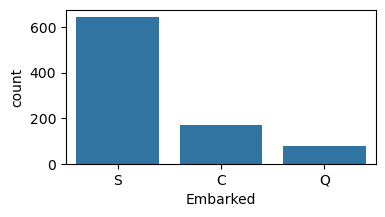

In [35]:
plt.figure(figsize=(4, 2))
sns.countplot(train_df, x='Embarked')
plt.show()

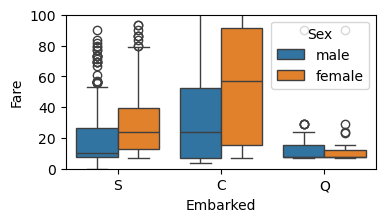

In [40]:
plt.figure(figsize=(4, 2))
sns.boxplot(train_df, x='Embarked', y='Fare', hue='Sex')
plt.ylim( [0, 100] )
plt.show()

In [39]:
# Embarked 결측값 눈으로 확인
train_df[ train_df['Embarked'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [43]:
# 데이터를 살펴보니 C가 가장 확률이 높다!
# 테이블 => 포인트 : .loc[인덱스, 컬럼]
#  .loc[인덱스가 나오는 조건, 컬럼]

train_df.loc[ train_df['Embarked'].isna() , 'Embarked' ] = 'C'

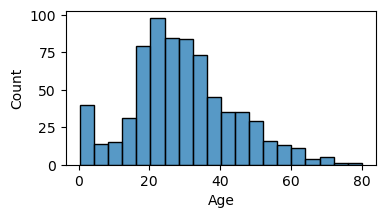

In [44]:
# Age
plt.figure(figsize=(4, 2))
sns.histplot( train_df, x='Age' )
plt.show()

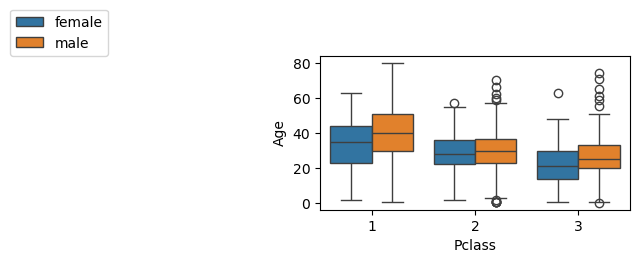

In [52]:
plt.figure(figsize=(4, 2))
sns.boxplot( train_df, x='Pclass', y='Age', hue='Sex' )
plt.legend(loc=(-1, 1))
plt.show()

In [61]:
# Pclass, Sex 별 평균 나이를 계산
temp = train_df.groupby( ['Pclass', 'Sex'] )['Age'].mean()

for ix in temp.index:
    cond1 = train_df['Pclass'] == ix[0]
    cond2 = train_df['Sex'] == ix[1]
    cond3 = train_df['Age'].isna()
    train_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[ix]

    cond1 = test_df['Pclass'] == ix[0]
    cond2 = test_df['Sex'] == ix[1]
    cond3 = test_df['Age'].isna()
    test_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[ix]

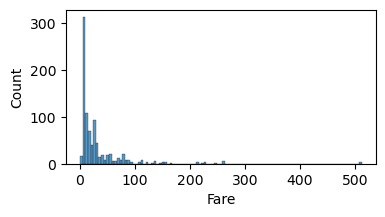

In [62]:
# Fare
plt.figure(figsize=(4, 2))
sns.histplot( train_df, x='Fare' )
plt.show()

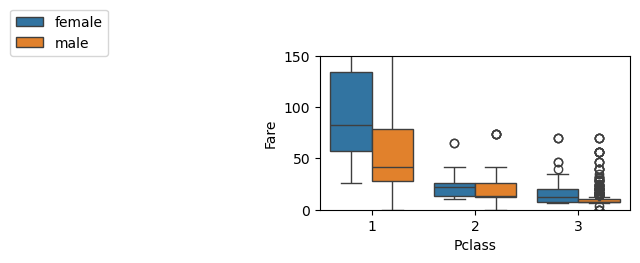

In [69]:
plt.figure(figsize=(4, 2))
sns.boxplot( train_df, x='Pclass', y='Fare', hue='Sex' )
plt.legend(loc=(-1, 1))
plt.ylim([0, 150])
plt.show()

In [70]:
# Fare가 비어있는 데이터
test_df[ test_df['Fare'].isna() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [71]:
train_df.groupby( ['Pclass', 'Sex'] )['Fare'].median()

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [74]:
test_df.loc[ test_df['Fare'].isna(), 'Fare' ]  = 7.925